In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sand_vec   = [0.8,0.8,0.8,0.8,0.7,0.63,0.67,0.67,0.67,0.67,0.67,0.67,0.4]
silt_vec   = [0.09,0.09,0.09,0.09,0.04,0.12,0.13,0.13,0.13,0.13,0.13,0.13,0.15]
clay_vec   = [0.11,0.11,0.11,0.11,0.26,0.25,0.20,0.2,0.2,0.2,0.2,0.2,0.45]
org_vec    = [0.0102,0.0102,0.0102,0.0025,0.0025,0.0025,0.0025,0.0025,\
              0.0025,0.0025,0.0025,0.0025,0.0025]
rhosoil_vec= [1654.962,1654.962,1654.962,1654.962,1777.5808,1952.94352,1969.7477,\
              1825.19628,2075.83018,1984.12624,1928.55192,1821.59631,1856.2751]

hyds_vec = np.zeros(13)
bch_vec  = np.zeros(13)
sucs_vec = np.zeros(13)
ssat_vec = np.zeros(13)
watr     = np.zeros(13)
swilt_vec= np.zeros(13)
sfc_vec  = np.zeros(13)
css_vec  = np.zeros(13)
cnsd_vec = np.zeros(13)

psi_tmp  = 2550000.0

In [3]:
for i in np.arange(0,13,1):
    hyds_vec[i] = (1.0-org_vec[i]) * 0.00706 * ( 10.0 ** (-0.60 + 1.26*sand_vec[i] - 0.64*clay_vec[i]) )\
                  + org_vec[i]*10**(-4)
    bch_vec[i]  = (1.0-org_vec[i]) * ( 3.1 + 15.4*clay_vec[i] - 0.3*sand_vec[i]) + org_vec[i]*3.0
    sucs_vec[i] = (1.0-org_vec[i]) * 10.0 * 10.0**( 1.54 - 0.95*sand_vec[i] + 0.63*silt_vec[i] ) \
                  + org_vec[i]*10.3
    ssat_vec[i] = (1.0-org_vec[i]) * ( 0.505 - 0.142*sand_vec[i] - 0.037*clay_vec[i]) \
                  + org_vec[i]*0.6
    watr[i]     = (1.0-org_vec[i]) * ( 0.02 + 0.018*clay_vec[i] ) + org_vec[i]*0.15
    
    sst_tmp  = 1.0 - max(min(ssat_vec[i], 0.85), 0.15)
    
    swilt_vec[i] = (ssat_vec[i] - watr[i]) * ( (psi_tmp/sucs_vec[i]) ** (-1.0/bch_vec[i]) ) \
                   + watr[i]
    sfc_vec[i]   = (ssat_vec[i] - watr[i]) * ( 1.157407 * 10**(-6) / hyds_vec[i])** \
                   (1.0 / (2.0*bch_vec[i] + 3.0) ) + watr[i]
    css_vec[i]   = (1.0-org_vec[i]) * ( 850*(1.0 - sand_vec[i] - clay_vec[i]) + \
                    865.0*clay_vec[i] + 750.0*sand_vec[i] ) + org_vec[i]*950.0
    cnsd_vec[i]  = (1.0-org_vec[i]) * ( 0.135*sst_tmp + 0.0239/sst_tmp )  /  \
                   (1.0 - 0.947*sst_tmp) + org_vec[i]*0.05

hyds_vec   = hyds_vec/1000.
sucs_vec   = sucs_vec*(-1.0)/1000.

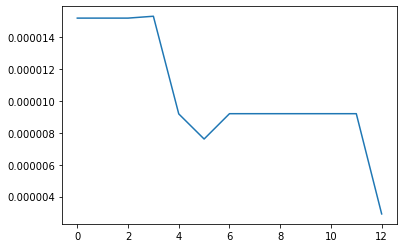

In [4]:
plt.plot(hyds_vec)